In [1]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import norm, t
import pandas_datareader.data as web
%matplotlib inline



In [2]:
# stock's tickers for Google Finance

tickers = ["C", "BAC", "JPM"]

In [3]:
i = 0

for ticker in tickers:
    print("Fetching %s... " % ticker, end=" ") 
    
    try:
        data = web.DataReader(ticker, data_source="google", 
                     start="2012-01-01", end="2017-04-30")["Close"]
        ok = True
        print("done")
    except:
        ok = False
        print("failed")
        
    if(ok):
        print(data.shape)
        
        cp = data.values   # close price time-series
        ret = cp[1:]/cp[0:-1] - 1   # return-series
        
        if(i == 0):
            ts = np.array([cp])
            rs = np.array([ret])
        else:
            ts = np.vstack([ts, cp])
            rs = np.vstack([rs, ret])
            
        i += 1

Fetching C...  done
(1339,)
Fetching BAC...  done
(1339,)
Fetching JPM...  done
(1339,)


In [4]:
type(data)

pandas.core.series.Series

In [5]:
len(data)

1339

In [6]:
print(data.shape)

(1339,)


In [7]:
cp

array([ 34.98,  34.95,  35.68, ...,  88.43,  87.61,  87.  ])

In [8]:
len(cp)

1339

In [9]:
ret

array([-0.00085763,  0.02088698, -0.00896861, ...,  0.00192613,
       -0.00927287, -0.00696268])

In [10]:
len(ret)

1338

In [11]:
ts

array([[ 28.33,  28.17,  28.51, ...,  60.1 ,  59.39,  59.12],
       [  5.8 ,   5.81,   6.31, ...,  23.89,  23.65,  23.34],
       [ 34.98,  34.95,  35.68, ...,  88.43,  87.61,  87.  ]])

In [12]:
len(ts)

3

In [13]:
rs

array([[-0.00564772,  0.01206958,  0.00140302, ..., -0.00182694,
        -0.01181364, -0.00454622],
       [ 0.00172414,  0.08605852, -0.02060222, ..., -0.00375313,
        -0.01004604, -0.01310782],
       [-0.00085763,  0.02088698, -0.00896861, ...,  0.00192613,
        -0.00927287, -0.00696268]])

In [14]:
ts.shape[0] #the dimension of the array


3

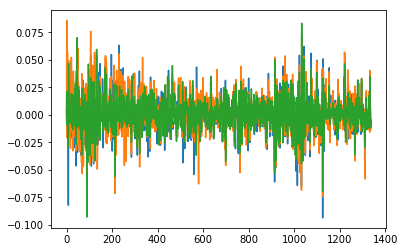

In [15]:
for i in range(ts.shape[0]):
    plt.plot( (rs[i,:] ))
_ = plt.axis("tight")

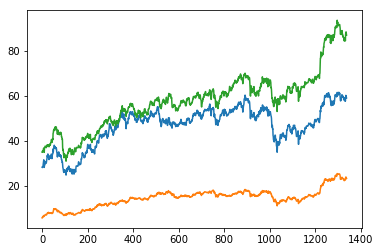

In [16]:
for i in range(ts.shape[0]):
    plt.plot( (ts[i,:] ))
_ = plt.axis("tight")

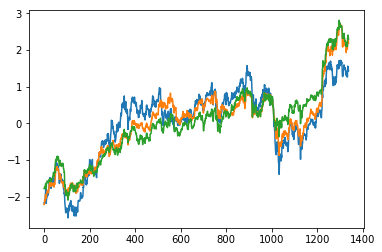

In [17]:
for i in range(ts.shape[0]):
    plt.plot( (ts[i,:]-np.mean(ts[i,:]))/np.std(ts[i,:], ddof=0) )

_ = plt.axis("tight")

In [18]:
for i in range(ts.shape[0]):
    print( (ts[i,:]-np.mean(ts[i,:]))/np.std(ts[i,:]))


[-2.16374617 -2.18241855 -2.14273975 ...,  1.54388759  1.46102892
  1.42951928]
[-2.21043123 -2.20792945 -2.08284027 ...,  2.315295    2.2552522
  2.17769692]
[-1.7774239  -1.77977018 -1.72267725 ...,  2.40287385  2.33874206
  2.29103427]


In [19]:
for i in range(ts.shape[0]):
    print( (ts[i,:]))

[ 28.33  28.17  28.51 ...,  60.1   59.39  59.12]
[  5.8    5.81   6.31 ...,  23.89  23.65  23.34]
[ 34.98  34.95  35.68 ...,  88.43  87.61  87.  ]


In [20]:
for i in range(ts.shape[0]):
    print(np.mean(ts[i,:]))

46.8707244212
14.6354219567
57.7064451083


In [21]:
for i in range(ts.shape[0]):
    print( np.std(ts[i,:]))

8.56880750944
3.99714853897
12.7861705678


In [22]:
a = np.array([1, 2, 3])
b = np.array([2, 3, 4])
np.vstack((a,b))


array([[1, 2, 3],
       [2, 3, 4]])